#**Data loading**

In [38]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

TensorFlow version: 2.15.0
Keras version: 2.15.0


In [39]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:

import os

train_path = '/content/drive/MyDrive/dog_cat/train'
validation_path = '/content/drive/MyDrive/dog_cat/validation'
test_path = '/content/drive/MyDrive/dog_cat/test'

#**First Model**

In [41]:
from keras import layers
from keras import models

img_rows = 150
img_cols = 150

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 17, 17, 128)      

In [43]:
#from keras import optimizers
import tensorflow
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

#**Data Preprocessing**

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_path,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    # This is the target directory
    validation_path,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


#**Model evaluation without data augmentation**

In [ ]:
history1 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 916s 9s/step - loss: 0.6921 - acc: 0.5005 - val_loss: 0.6921 - val_acc: 0.5050
Epoch 2/30
100/100 [==============================] - 20s 204ms/step - loss: 0.6847 - acc: 0.5600 - val_loss: 0.6794 - val_acc: 0.5990
Epoch 3/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6750 - acc: 0.5770 - val_loss: 0.6659 - val_acc: 0.6100
Epoch 4/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6608 - acc: 0.6005 - val_loss: 0.6515 - val_acc: 0.6220
Epoch 5/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6458 - acc: 0.6285 - val_loss: 0.6391 - val_acc: 0.6340
Epoch 6/30
100/100 [==============================] - 16s 159ms/step - loss: 0.6302 - acc: 0.6635 - val_loss: 0.6253 - val_acc: 0.6430
Epoch 7/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6078 - acc: 0.6710 - val_loss: 0.6129 - val_acc: 0.6590
Epoch 8/30
100/100 [==============================] - 16s

In [47]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 0 Axes>

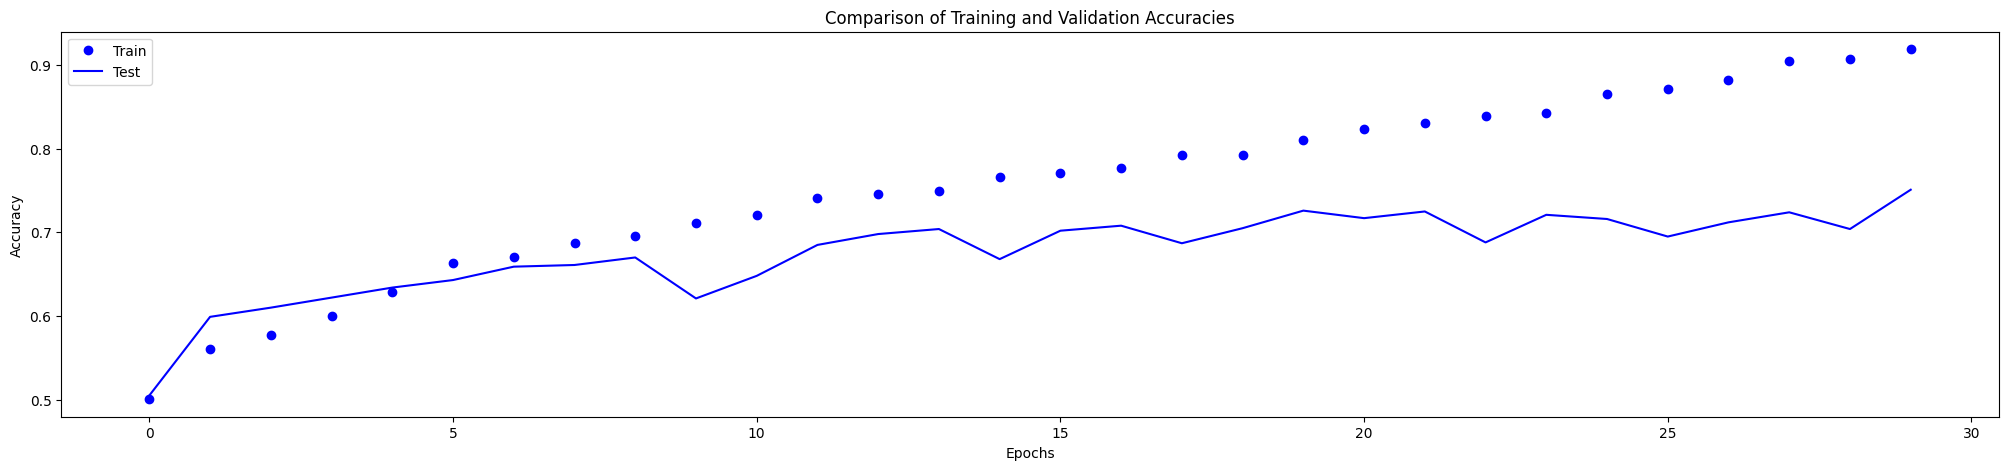

<Figure size 640x480 with 0 Axes>

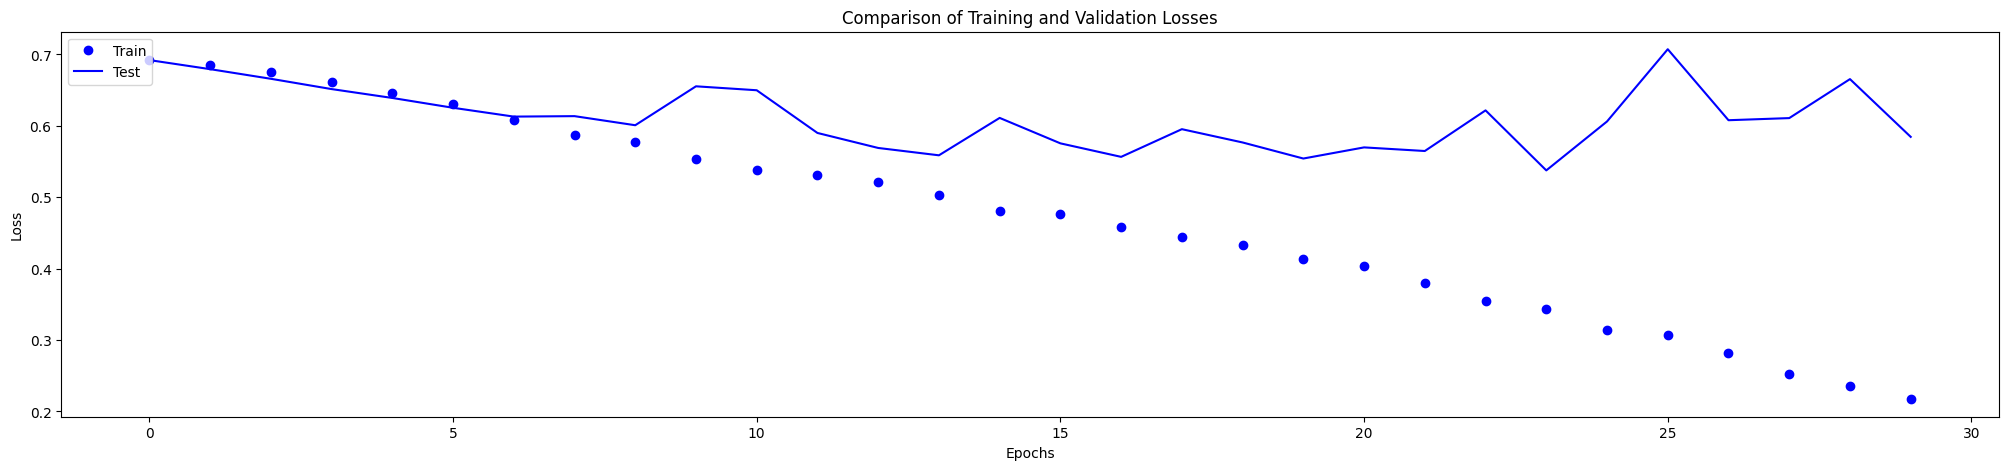

In [ ]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')

PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

In [ ]:
img_rows = 150
img_cols = 150

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')

#history2 = model2.fit_generator(
history2 = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 27s 250ms/step - loss: 0.6937 - acc: 0.5080 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 28s 277ms/step - loss: 0.6929 - acc: 0.5010 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 25s 245ms/step - loss: 0.6912 - acc: 0.5215 - val_loss: 0.6883 - val_acc: 0.5670
Epoch 4/30
100/100 [==============================] - 25s 246ms/step - loss: 0.6887 - acc: 0.5375 - val_loss: 0.6844 - val_acc: 0.5160
Epoch 5/30
100/100 [==============================] - 25s 253ms/step - loss: 0.6840 - acc: 0.5605 - val_loss: 0.6762 - val_acc: 0.5620
Epoch 6/30
100/100 [==============================] - 24s 236ms/step - loss: 0.6752 - acc: 0.5810 - val_loss: 0.6676 - val_acc: 0.5960
Epoch 7/30
100/100 [==============================] - 24s 243ms/step - loss: 0.6731 - acc: 0.5890 - val_lo

In [ ]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotTwoAccuracyComparison(acc1, val_acc1, acc2, val_acc2, lab1 = 'Model 1', lab2 = 'Model 2'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def PlotTwoLossComparison(loss1, val_loss1, loss2, val_loss2, lab1 = 'Model 1', lab2 = 'Model 2'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

<Figure size 640x480 with 0 Axes>

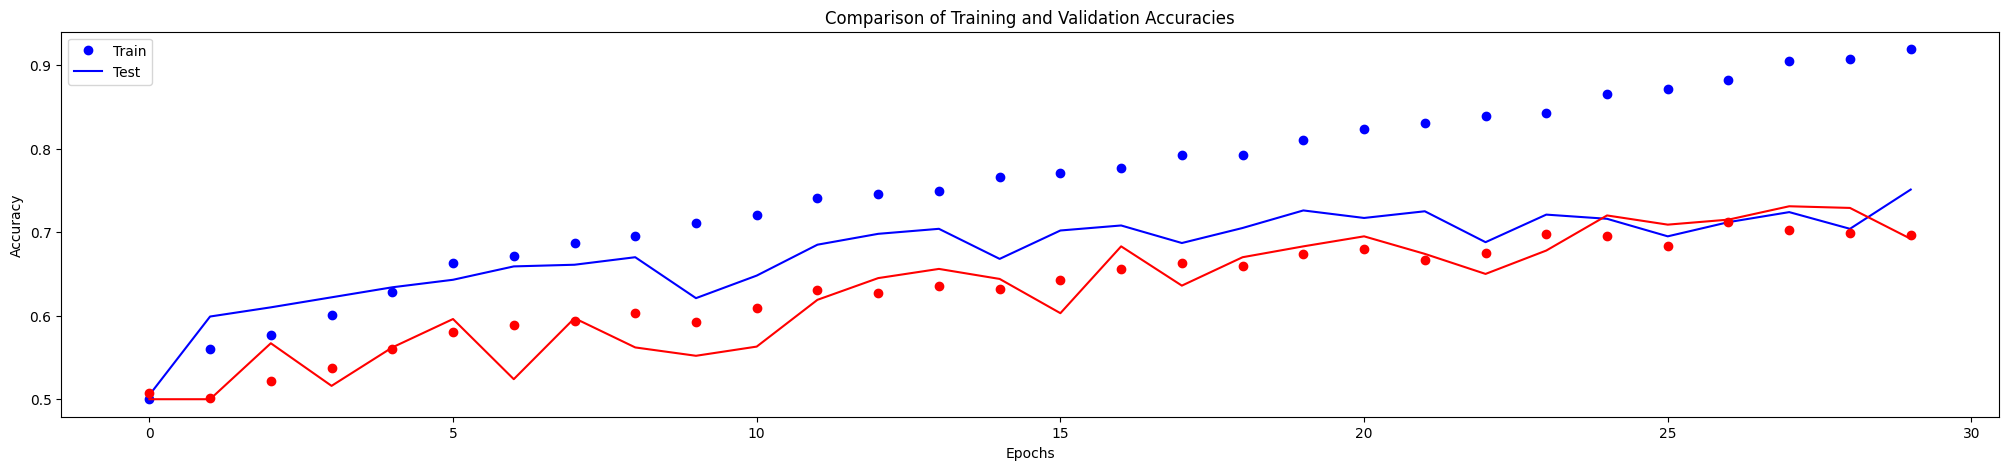

<Figure size 640x480 with 0 Axes>

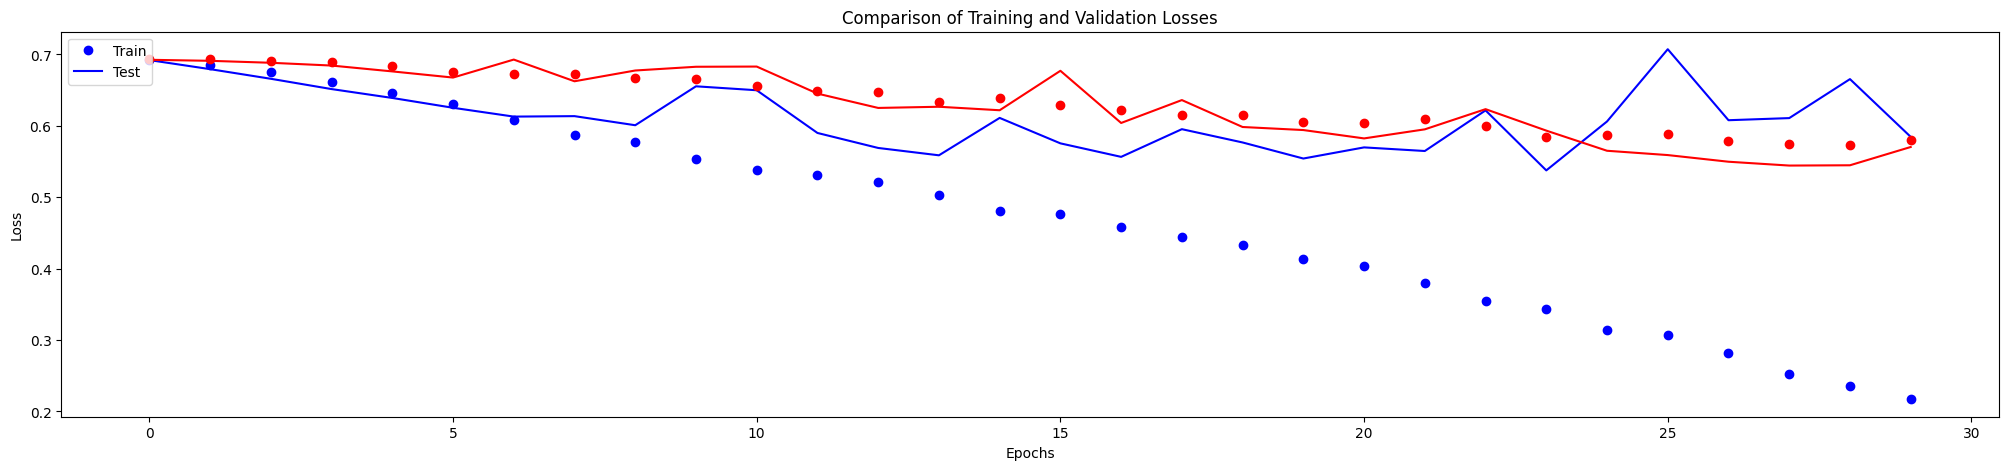

In [ ]:
PlotTwoAccuracyComparison(acc1, val_acc1, acc2, val_acc2, lab1 = 'Model 1', lab2 = 'Model 2')
PlotTwoLossComparison(loss1, val_loss1, loss2, val_loss2, lab1 = 'Model 1', lab2 = 'Model 2')

Comparison of model accuracy for training and validation data (test) over 30 epochs:
Training accuracy - is clearly higher than validation accuracy over all epochs, which may suggest overtraining of the model. Overfitting occurs when a model overlearns details and noise in training data that do not generalize to new data.
Validation accuracy - shows significant fluctuations, which may indicate that the model is not stable in its ability to generalize to the validation data. This may be the result of too much variance in the data, insufficient validation data, or too aggressive training.
Training Accuracy - Shows an overall upward trend, peaking at epoch 30, indicating an improvement in the model's ability to make predictions on training data as training progresses.
Validation accuracy - reaches its maximum around epoch 10-12, after which it appears to stabilize, but with lower accuracy than maximum. This suggests that further training after approximately epoch 12 does not provide significant benefits to model performance on the validation data.
The discrepancy between training and validation accuracy could be a sign of overfitting, but the lack of an ever-increasing gap suggests that the model still has the ability to learn without drastically degrading performance on the validation data.
Validation accuracy oscillation - indicates that the model may not be well-tuned or that the batch of validation data may not be representative. To improve this, techniques such as early stopping, regularization (e.g. dropout, L1/L2 regularization) or more validation data could be considered.

Comparison of the loss function values for the training set (Train) and the validation set (Test) for 30 epochs of model training:
Training loss decreases - Over 30 epochs, the loss function for the training set shows a generally decreasing trend, reaching its lowest value at the end. This indicates that the model is learning and improving its predictions from the training data.
Validation loss fluctuates - Although the validation loss generally decreases until around the 15th epoch, we see increases and decreases thereafter. This oscillation may indicate that the model does not necessarily generalize well to data it has not seen, or it may be the result of the small size of the validation set not covering a sufficient variety of cases.
Signs of overtraining - From around epoch 10, although the training loss continues to decrease, the validation loss begins to increase or oscillate. This may be a sign of overtraining, as the model becomes increasingly fit to the training data at the expense of generalization ability.
Difference between losses - The loss value for the training data is significantly lower than for the validation data at most points, further indicating possible overtraining. It is good to note that the ideal situation is one where the loss lines for training and validation are close to each other.
Validation Loss Variance - A large variance in the validation loss indicates that the model is unstable on the validation data. This could suggest the need to introduce regularization techniques or use other methods to prevent overfitting, such as increasing the size of the validation set, using data augmentation techniques, or introducing dropouts.
Advanced training epochs - In later epochs, the validation loss function begins to show smaller oscillations, which may indicate that the model is starting to stabilize its predictions also on the validation data. However, it is still larger than the initial validation loss, which may suggest that the model would be more effective if it were stopped training earlier, e.g. using an early stopping technique.
To further improve the model, it is worth using regularization techniques and possibly considering increasing the size and diversity of the validation set. Additionally, using an early stop after approximately 10-15 epochs could prevent overfitting and potentially improve the model's generalization ability.

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

model3 = models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.1))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.1))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.1))
model3.add(layers.Conv2D(128, (3, 3), activation='elu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.1))
model3.add(layers.Conv2D(64, (3, 3), activation='elu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(16, activation='elu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 74, 74, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 36, 36, 128)      

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=20,
        class_mode='binary')

#history2 = model2.fit_generator(
history3 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 25s 253ms/step - loss: 0.5510 - acc: 0.7195 - val_loss: 0.5254 - val_acc: 0.7420
Epoch 2/30
100/100 [==============================] - 25s 250ms/step - loss: 0.5427 - acc: 0.7260 - val_loss: 0.5502 - val_acc: 0.7190
Epoch 3/30
100/100 [==============================] - 25s 254ms/step - loss: 0.5499 - acc: 0.7280 - val_loss: 0.5271 - val_acc: 0.7290
Epoch 4/30
100/100 [==============================] - 24s 235ms/step - loss: 0.5421 - acc: 0.7295 - val_loss: 0.5311 - val_acc: 0.7370
Epoch 5/30
100/100 [==============================] - 24s 244ms/step - loss: 0.5301 - acc: 0.7265 - val_loss: 0.5685 - val_acc: 0.7000
Epoch 6/30
100/100 [==============================] - 23s 235ms/step - loss: 0.5410 - acc: 0.7240 - val_loss: 0.5183 - val_acc: 0.7490
Epoch 7/30
100/100 [==============================] - 23s 230ms/step - loss: 0.5277 - acc: 0.7390 - val_lo

In [49]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

##Plots

In [50]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies for different models')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

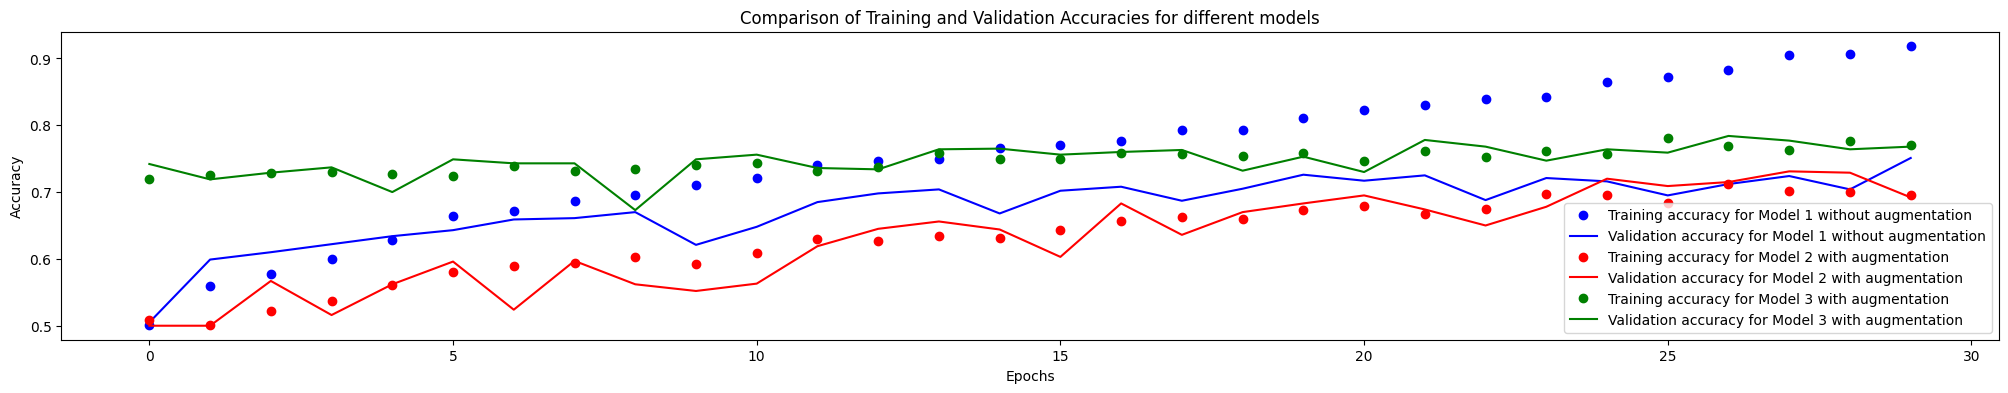

In [55]:
# Compare the accuracies of three training processes
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
acc12 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']


PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Model 1 without augmentation', 'Model 2 with augmentation', 'Model 3 with augmentation')

Comparing accuracy on training and validation sets for three different machine learning models over 30 epochs. Model 1 is without data augmentation, while Models 2 and 3 are with augmentation:

Model 1 (no augmentation) - In the case of Model 1, both training and validation accuracy increase with the number of epochs, but the validation accuracy is consistently lower than the training accuracy, which may indicate overtraining. The lack of data augmentation probably contributes to the model being too adjusted to training noise and generalizing less well to unknown data.

Model 2 (with augmentation) - Model 2 shows a smaller difference between training and validation accuracy, indicating better generalization, probably due to the use of data augmentation. However, oscillations in validation accuracy suggest that the model may not be completely stable, although augmentation likely helps avoid overfitting.

Model 3 (with augmentation) - For Model 3, training accuracy is lower than for Model 2, but validation accuracy is higher and more stable than for Model 2. This suggests that Model 3 is most effective at generalizing to unknown data and may have the best balance between fit and generalization.

Impact of Augmentation - Data augmentation appears to have a positive impact on the models' ability to generalize, as seen in Models 2 and 3. These models show better validation accuracy than Model 1, which does not use data augmentation.

Accuracy trends - Models with data augmentation show less extreme differences between training and validation accuracy, which is preferred in practical applications because it indicates better generalization of the model.

The data suggests that data augmentation helps improve model generalization. Model 3 with augmentation seems to be the best choice among those analyzed due to its stable and high validation accuracy. Model 1 without augmentation may be overtrained, as seen in the higher training accuracy compared to the validation one. Data augmentation models demonstrate that this technique can be effective in making models more robust to overfitting and improving their ability to generalize to unknown data. It should be emphasized that these models also have an added dropout.

In [52]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 4.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses for different models')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

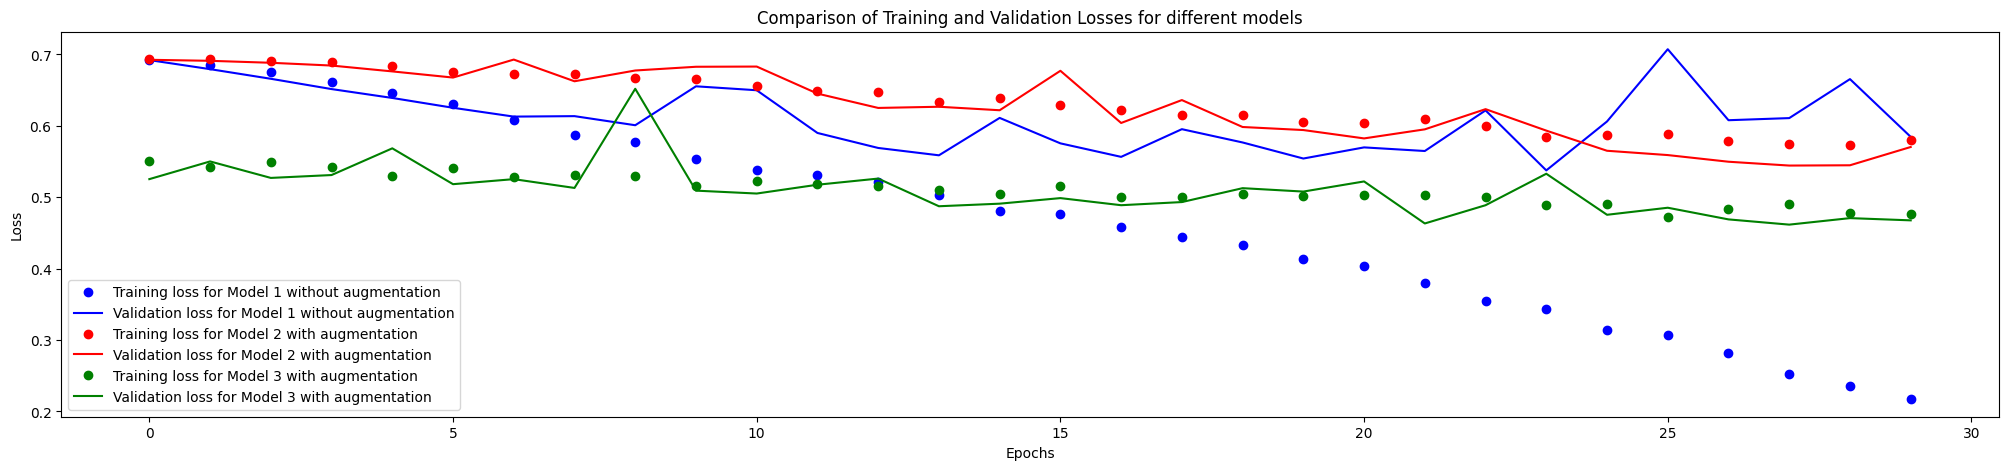

In [54]:
# Compare the losses of three training processes
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Model 1 without augmentation', 'Model 2 with augmentation', 'Model 3 with augmentation')

The graph shows the values of the loss function on the training and validation sets for three machine learning models, in which Model 1 does not use data augmentation, and Models 2 and 3 do:

Model 1 (no augmentation) - Training loss decreases over epochs, which is expected behavior and indicates that the model is learning. However, the validation loss is variable and generally remains higher than the training loss, which may indicate that the model has been overtrained.

Model 2 (with augmentation) - It has a lower training loss than Model 1, but its validation loss is approximately at the same level, indicating better generalization of the model thanks to data augmentation. The oscillations in the validation loss may indicate that the model still has some difficulty adapting to the validation data, but is more stable than Model 1.

Model 3 (with augmentation) - Presents the lowest and most stable validation loss of all models, suggesting the best generalization ability. The training loss for this model is higher than for Model 2, which may indicate a more conservative fit to the training data, which is beneficial for generalization.

Differences between models - Models with data augmentation (2 and 3) have lower validation losses compared to Model 1, which highlights the advantages of data augmentation in improving generalization. These models show smaller differences between training and validation loss, which is preferred because it may indicate a lower risk of overtraining.

Data Augmentation - The stability of the validation loss in Models 2 and 3 can be directly related to the use of data augmentation, which helps avoid overfitting and allows models to generalize better to unknown data.

Model 3 with augmentation seems to be the most promising, given its low and stable validation loss and relatively stable training loss. This suggests that this model is able to generalize to unknown data while maintaining a healthy degree of fit to the training data. Data augmentation in Models 2 and 3 contributes to improved generalization compared to Model 1 without augmentation.

#**Model 1 experiments**

In [56]:
from keras import layers
from keras import models

img_rows = 150
img_cols = 150

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [57]:
#from keras import optimizers
import tensorflow
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')


history4 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 27s 251ms/step - loss: 0.6934 - acc: 0.5010 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 25s 254ms/step - loss: 0.6917 - acc: 0.5150 - val_loss: 0.6886 - val_acc: 0.5630
Epoch 3/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6850 - acc: 0.5505 - val_loss: 0.6904 - val_acc: 0.5050
Epoch 4/30
100/100 [==============================] - 25s 253ms/step - loss: 0.6818 - acc: 0.5600 - val_loss: 0.6725 - val_acc: 0.5880
Epoch 5/30
100/100 [==============================] - 24s 243ms/step - loss: 0.6812 - acc: 0.5550 - val_loss: 0.6706 - val_acc: 0.5860
Epoch 6/30
100/100 [==============================] - 23s 235ms/step - loss: 0.6703 - acc: 0.5930 - val_loss: 0.6957 - val_acc: 0.5420
Epoch 7/30
100/100 [==============================] - 30s 299ms/step - loss: 0.6712 - acc: 0.5815 - val_lo

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#add more data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness, 0.8 to 1.2 range
    channel_shift_range=0.2,  # Randomly shift color channels
    fill_mode='nearest',  # Fill missing pixels with the nearest filled value
    vertical_flip=True)  # Enable vertical flipping


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')


history5 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 29s 266ms/step - loss: 0.5768 - acc: 0.6895 - val_loss: 0.5571 - val_acc: 0.7070
Epoch 2/30
100/100 [==============================] - 26s 265ms/step - loss: 0.5729 - acc: 0.6975 - val_loss: 0.5970 - val_acc: 0.6700
Epoch 3/30
100/100 [==============================] - 26s 263ms/step - loss: 0.5762 - acc: 0.6960 - val_loss: 0.5634 - val_acc: 0.7020
Epoch 4/30
100/100 [==============================] - 28s 277ms/step - loss: 0.5707 - acc: 0.7075 - val_loss: 0.5404 - val_acc: 0.7210
Epoch 5/30
100/100 [==============================] - 26s 263ms/step - loss: 0.5682 - acc: 0.7055 - val_loss: 0.5872 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 26s 263ms/step - loss: 0.5731 - acc: 0.6955 - val_loss: 0.5515 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 26s 261ms/step - loss: 0.5595 - acc: 0.7155 - val_lo

In [62]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies for 1 model')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

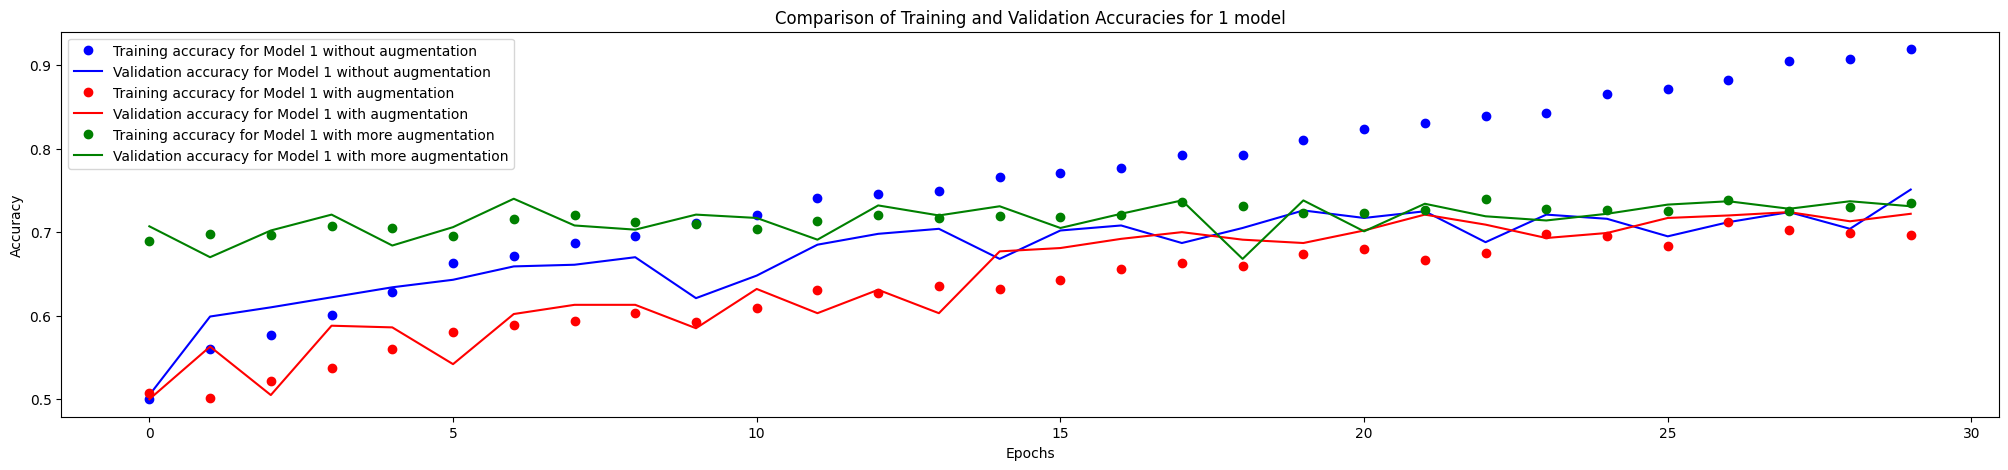

In [63]:
# Compare the accuracies of three training processes
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
acc12 = history4.history['acc']
val_acc2 = history4.history['val_acc']
acc3 = history5.history['acc']
val_acc3 = history5.history['val_acc']


PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Model 1 without augmentation', 'Model 1 with augmentation', 'Model 1 with more augmentation')

Comparison of training and validation accuracy for a machine learning model that was tested with different types of data augmentation:

-Blue line with dots: Training accuracy for Model 1 without data augmentation.
-Red line with dots: Validation accuracy for Model 1 with data augmentation.
-Green line with dots: Training accuracy for Model 1 with additional data augmentation.


**Observations**:
    - All data series show an increase in accuracy with each epoch, which is a sign that the model is learning and improving its classification ability with each iteration.
    - Training accuracy without augmentation (blue) is generally lower than training accuracy with augmentation (green), suggesting that data augmentation may help improve model performance during training.
    - data augmentation also helps in model generalization, but not in such a significant way.
    - We can also see that over time, especially after about 20 epochs, the differences in validation accuracy between different approaches decrease. This may suggest that the model is starting to stabilize and further increasing the number of epochs may not bring significant improvement.

Overfitting - There does not appear to be significant overfitting because the validation accuracy lines are not significantly lower than the corresponding training accuracy lines.

To improve results I should:
consider further increasing data augmentation or data diversity to see if validation accuracy can be further improved.
Monitor validation accuracy with further epochs to see if the model starts to show signs of overfitting.
Consider adjusting model hyperparameters or using regularization techniques to see if they can further improve the generalization ability of the model.

- data augmentation can positively impact both the training and validation accuracy of the model, and the model will likely continue to improve with more epochs without a significant risk of overfitting.

In [64]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 4.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses for 1 model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

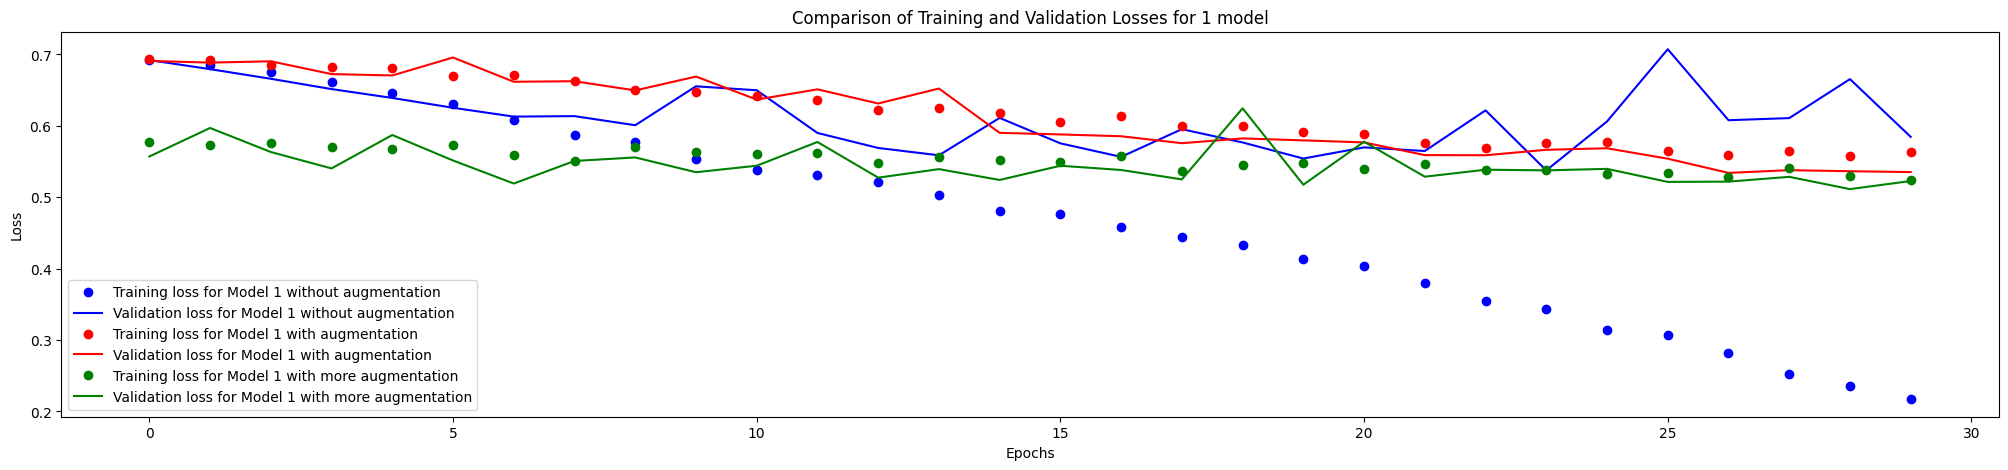

In [65]:
# Compare the losses of three training processes
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history4.history['loss']
val_loss2 = history4.history['val_loss']
loss3 = history5.history['loss']
val_loss3 = history5.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Model 1 without augmentation', 'Model 1 with augmentation', 'Model 1 with more augmentation')

Comparison of loss during training and validation for a machine learning model:


For all data series, the loss decreases as the number of epochs increases, indicating that the model is learning and improving over time.
The training loss for the model with augmentation (red dots) and with more augmentation (green dots) is generally lower than for the model without augmentation (blue dots), suggesting that data augmentation improves the model's ability to learn.
The validation loss for all three cases shows larger fluctuations than the training loss, which is typical for validation data that is less homogeneous than training data.
In the case of validation loss, the model with greater data augmentation (green solid) generally has lower values than the model with augmentation (red solid) and without augmentation (blue solid), which may indicate better generalization of the model with greater data augmentation.

**Overfitting**:
    - If the training loss is much lower than the validation loss, it may indicate overfitting, i.e. a situation in which the model adapts too well to the training data and copes worse with new data. This is not much visible in this chart, which is a positive sign.

#**Model 2 experiments**

In [66]:
from keras import layers
from keras import models
from keras import optimizers

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [67]:
history6 = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 277ms/step - loss: 0.6929 - acc: 0.5085 - val_loss: 0.6918 - val_acc: 0.5340
Epoch 2/30
100/100 [==============================] - 27s 268ms/step - loss: 0.6932 - acc: 0.5095 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6905 - acc: 0.5170 - val_loss: 0.6875 - val_acc: 0.5070
Epoch 4/30
100/100 [==============================] - 27s 268ms/step - loss: 0.6875 - acc: 0.5490 - val_loss: 0.6844 - val_acc: 0.5560
Epoch 5/30
100/100 [==============================] - 26s 261ms/step - loss: 0.6829 - acc: 0.5700 - val_loss: 0.6730 - val_acc: 0.5850
Epoch 6/30
100/100 [==============================] - 26s 261ms/step - loss: 0.6759 - acc: 0.5790 - val_loss: 0.6806 - val_acc: 0.5420
Epoch 7/30
100/100 [==============================] - 28s 279ms/step - loss: 0.6757 - acc: 0.5805 - val_loss: 0.6790 - val_acc: 0.5590
Epoch 8/30
100/100 [==============================] - 2

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#add more data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness, 0.8 to 1.2 range
    channel_shift_range=0.2,  # Randomly shift color channels
    fill_mode='nearest',  # Fill missing pixels with the nearest filled value
    vertical_flip=True  # Enable vertical flipping
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')


history7 = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 32s 269ms/step - loss: 0.5996 - acc: 0.6855 - val_loss: 0.5589 - val_acc: 0.7080
Epoch 2/30
100/100 [==============================] - 27s 267ms/step - loss: 0.5850 - acc: 0.6885 - val_loss: 0.5625 - val_acc: 0.7060
Epoch 3/30
100/100 [==============================] - 26s 264ms/step - loss: 0.5604 - acc: 0.7180 - val_loss: 0.6627 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 26s 265ms/step - loss: 0.5638 - acc: 0.7065 - val_loss: 0.5868 - val_acc: 0.6920
Epoch 5/30
100/100 [==============================] - 26s 263ms/step - loss: 0.5802 - acc: 0.6965 - val_loss: 0.7327 - val_acc: 0.6100
Epoch 6/30
100/100 [==============================] - 27s 268ms/step - loss: 0.5688 - acc: 0.7065 - val_loss: 0.6025 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 28s 281ms/step - loss: 0.5819 - acc: 0.6975 - val_lo

In [69]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies for 2 model')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

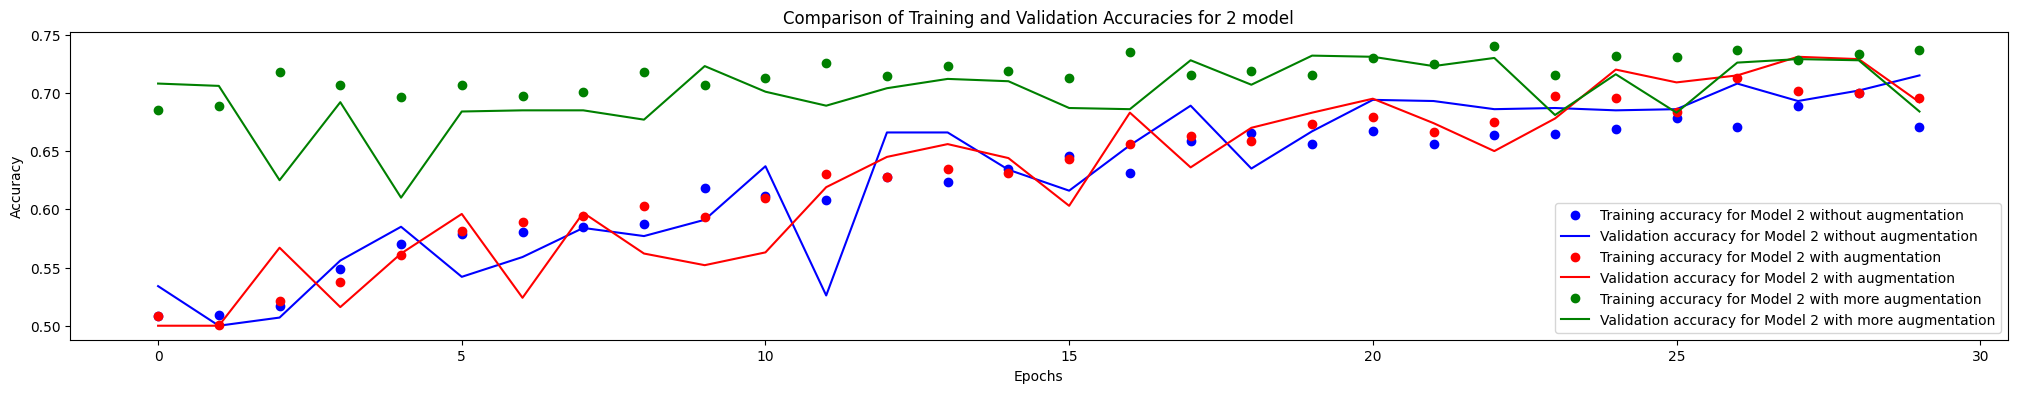

In [70]:
# Compare the accuracies of three training processes
acc1 = history6.history['acc']
val_acc1 = history6.history['val_acc']
acc12 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history7.history['acc']
val_acc3 = history7.history['val_acc']


PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Model 2 without augmentation', 'Model 2 with augmentation', 'Model 2 with more augmentation')

Comparison of training and validation accuracy for model 2 with different degrees of data augmentation.

The graph shows that both training and validation accuracy generally increase with the number of epochs, which is a positive sign and suggests that the model is learning and improving its predictions.

A model without data augmentation (blue lines) tends to achieve lower both training and validation accuracy compared to models that use augmentation.
The model with augmentation (red lines) and with more augmentation (green lines) appears to achieve better validation accuracy, suggesting that data augmentation helps with model generalization.

The blue validation line shows significant variability, which may indicate lower model stability without data augmentation across different validation datasets.
The green validation line is relatively stable and shows less fluctuations than the blue validation line, suggesting that greater augmentation can lead to more stable predictions on the validation set.

The model with greater augmentation (green lines) appears to converge faster to stable, high accuracy, especially on the validation set, which is desirable in practical applications.

Data augmentation can improve a model's accuracy and its ability to generalize to previously unseen data. The model with greater augmentation seems to be the most promising, achieving higher and more stable validation accuracy.

In [71]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 4.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses for 2 model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

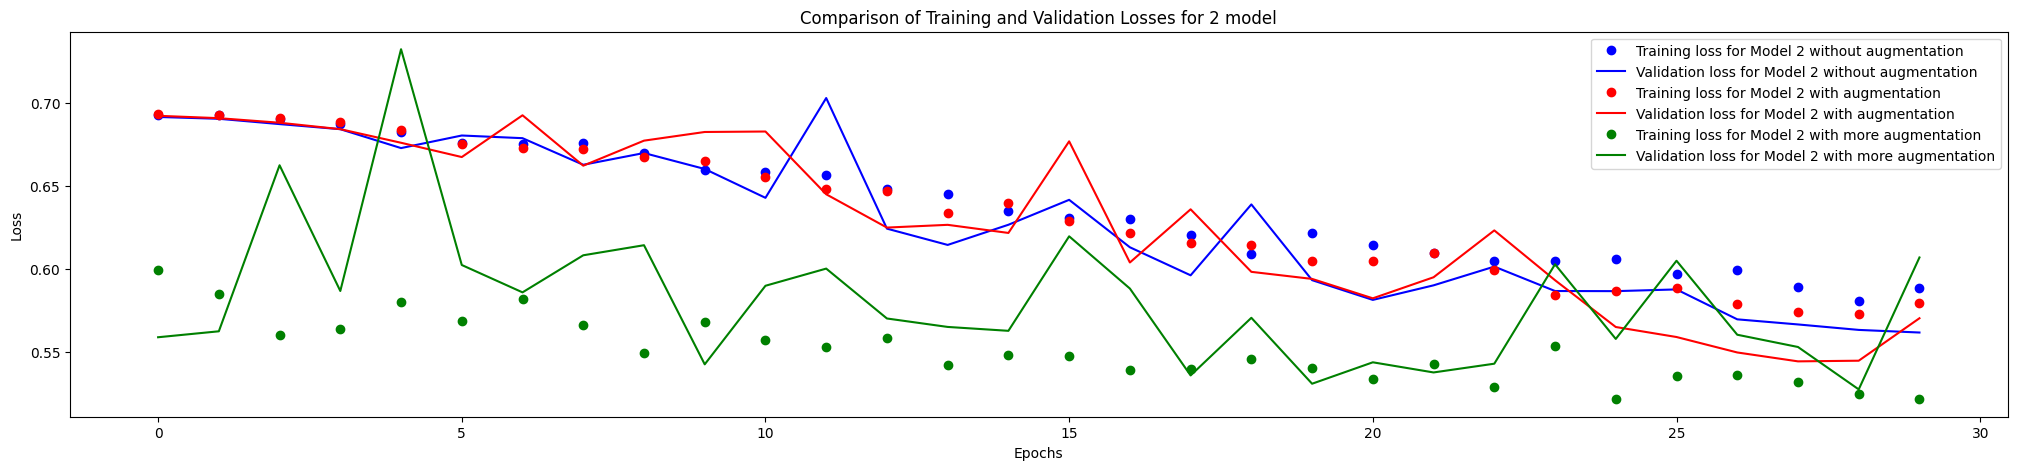

In [72]:
# Compare the losses of three training processes
loss1 = history6.history['loss']
val_loss1 = history6.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history7.history['loss']
val_loss3 = history7.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Model 2 without augmentation', 'Model 2 with augmentation', 'Model 2 with more augmentation')

Comparison of training and validation loss for the second machine learning model with different levels of data augmentation:

In general, the training and validation loss for all variants decreases over time, suggesting that the model learns and improves its predictions as training progresses.

The validation loss for all scenarios shows greater variability than the training loss. This is typical because validation data is often not as representative or homogeneous as training data, which can lead to greater variability in results.


The model with augmentation (red lines) and the model with more augmentation (green lines) generally have a lower validation loss than the model without augmentation (blue lines), suggesting that augmentation can help the model generalize to new data.
    - This is especially noticeable in the case of the green line (greater augmentation), where the validation loss appears to be the lowest at most points.

The lack of significant separation between the training and validation loss indicates that the model is not overtrained. However, some increases in the validation loss, especially for the model without augmentation, may indicate the beginnings of overfitting.

The end of the graph shows an interesting trend: the validation loss for the model with greater augmentation (green line) drops significantly, while no such improvement is visible for the other models. This may indicate that at this point the model with greater augmentation begins to generalize better.

The graph shows the positive impact of data augmentation on the model's ability to generalize. In particular, greater data augmentation seems to produce the best results in terms of reducing validation loss, which is desirable in the context of model performance on new, unseen data.

#**Model 3 experiments**

In [73]:
history8 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 27s 271ms/step - loss: 0.5177 - acc: 0.7415 - val_loss: 0.4601 - val_acc: 0.7820
Epoch 2/30
100/100 [==============================] - 27s 272ms/step - loss: 0.5329 - acc: 0.7195 - val_loss: 0.4950 - val_acc: 0.7630
Epoch 3/30
100/100 [==============================] - 28s 279ms/step - loss: 0.5226 - acc: 0.7450 - val_loss: 0.5010 - val_acc: 0.7520
Epoch 4/30
100/100 [==============================] - 28s 285ms/step - loss: 0.5183 - acc: 0.7450 - val_loss: 0.4737 - val_acc: 0.7790
Epoch 5/30
100/100 [==============================] - 29s 287ms/step - loss: 0.5038 - acc: 0.7580 - val_loss: 0.4842 - val_acc: 0.7710
Epoch 6/30
100/100 [==============================] - 27s 273ms/step - loss: 0.5293 - acc: 0.7475 - val_loss: 0.4879 - val_acc: 0.7710
Epoch 7/30
100/100 [==============================] - 27s 269ms/step - loss: 0.5099 - acc: 0.7495 - val_loss: 0.4882 - val_acc: 0.7730
Epoch 8/30
100/100 [==============================] - 2

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#add more data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness, 0.8 to 1.2 range
    channel_shift_range=0.2,  # Randomly shift color channels
    fill_mode='nearest',  # Fill missing pixels with the nearest filled value
    vertical_flip=True  # Enable vertical flipping
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')


history9 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 34s 285ms/step - loss: 0.4662 - acc: 0.7740 - val_loss: 0.4804 - val_acc: 0.7750
Epoch 2/30
100/100 [==============================] - 29s 292ms/step - loss: 0.4776 - acc: 0.7670 - val_loss: 0.5208 - val_acc: 0.7660
Epoch 3/30
100/100 [==============================] - 28s 284ms/step - loss: 0.4762 - acc: 0.7695 - val_loss: 0.4634 - val_acc: 0.7740
Epoch 4/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4565 - acc: 0.7845 - val_loss: 0.4582 - val_acc: 0.7880
Epoch 5/30
100/100 [==============================] - 28s 282ms/step - loss: 0.4652 - acc: 0.7695 - val_loss: 0.4597 - val_acc: 0.7910
Epoch 6/30
100/100 [==============================] - 29s 285ms/step - loss: 0.4594 - acc: 0.7765 - val_loss: 0.4921 - val_acc: 0.7800
Epoch 7/30
100/100 [==============================] - 28s 280ms/step - loss: 0.4531 - acc: 0.7800 - val_lo

In [75]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies for 3 model')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

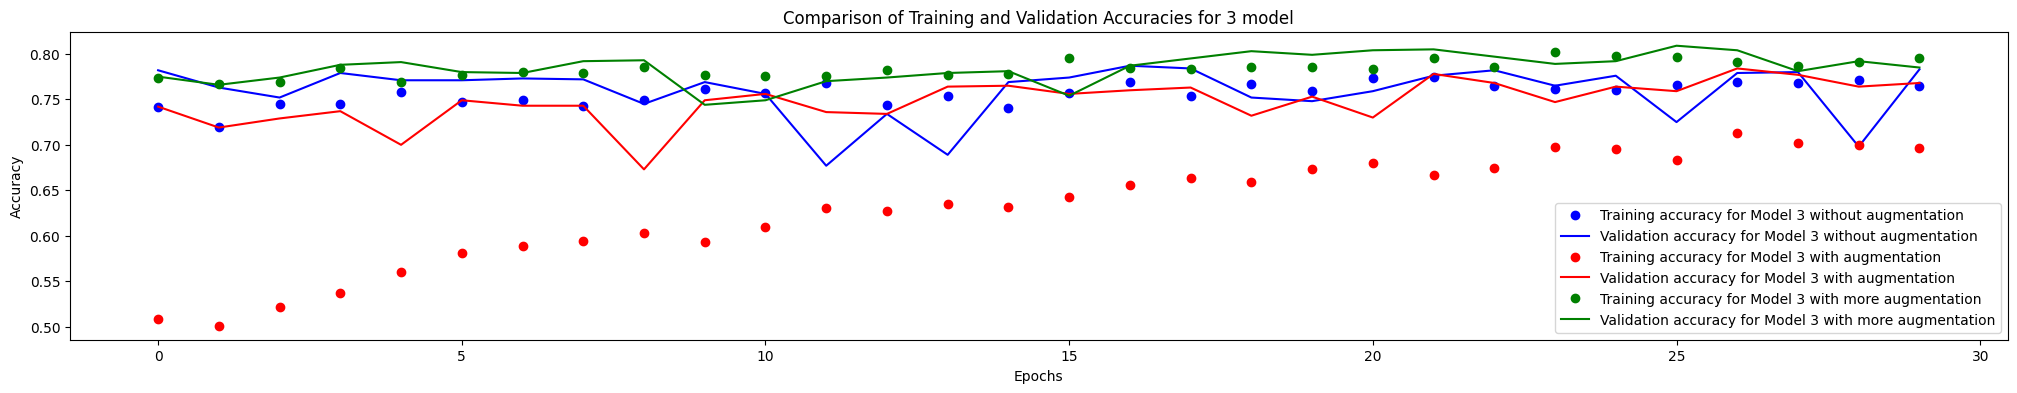

In [76]:
# Compare the accuracies of three training processes
acc1 = history8.history['acc']
val_acc1 = history8.history['val_acc']
acc12 = history3.history['acc']
val_acc2 = history3.history['val_acc']
acc3 = history9.history['acc']
val_acc3 = history9.history['val_acc']


PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Model 3 without augmentation', 'Model 3 with augmentation', 'Model 3 with more augmentation')

Comparison of training and validation accuracy for a third machine learning model using different data augmentation strategies:

The training accuracy of the model without augmentation (blue dots) is generally lower than the accuracy of the model with augmentation (red dots) and with more augmentation (green dots).
The validation accuracy for the model with greater augmentation (solid green) is generally higher and more stable than for the other models, which indicates better generalization of this model.

All models show an increase in training accuracy over epochs, which is a sign of successful learning.
Validation accuracy is less stable than training accuracy, except for the model with greater augmentation (green solid), which shows less variability and a higher value.

The model without augmentation (blue lines) shows the greatest discrepancies between training and validation accuracy, which may indicate overtraining or poor generalization.
The model with greater data augmentation (green lines) has a smaller gap between training and validation accuracy, which may indicate better generalization ability.

Data augmentation (red and green lines) appears to have a positive impact on validation accuracy, which is crucial for model performance on new data.
Models with augmentation and more augmentation achieve higher validation accuracy than the model without augmentation, indicating that augmentation is beneficial for this model.

Data augmentation tends to improve both the training and validation accuracy of the model, and the model with more data augmentation appears to have the best generalization ability. This plot also suggests that augmentation can be an effective tool to improve model stability during validation.

In [77]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 4.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses for 2 model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

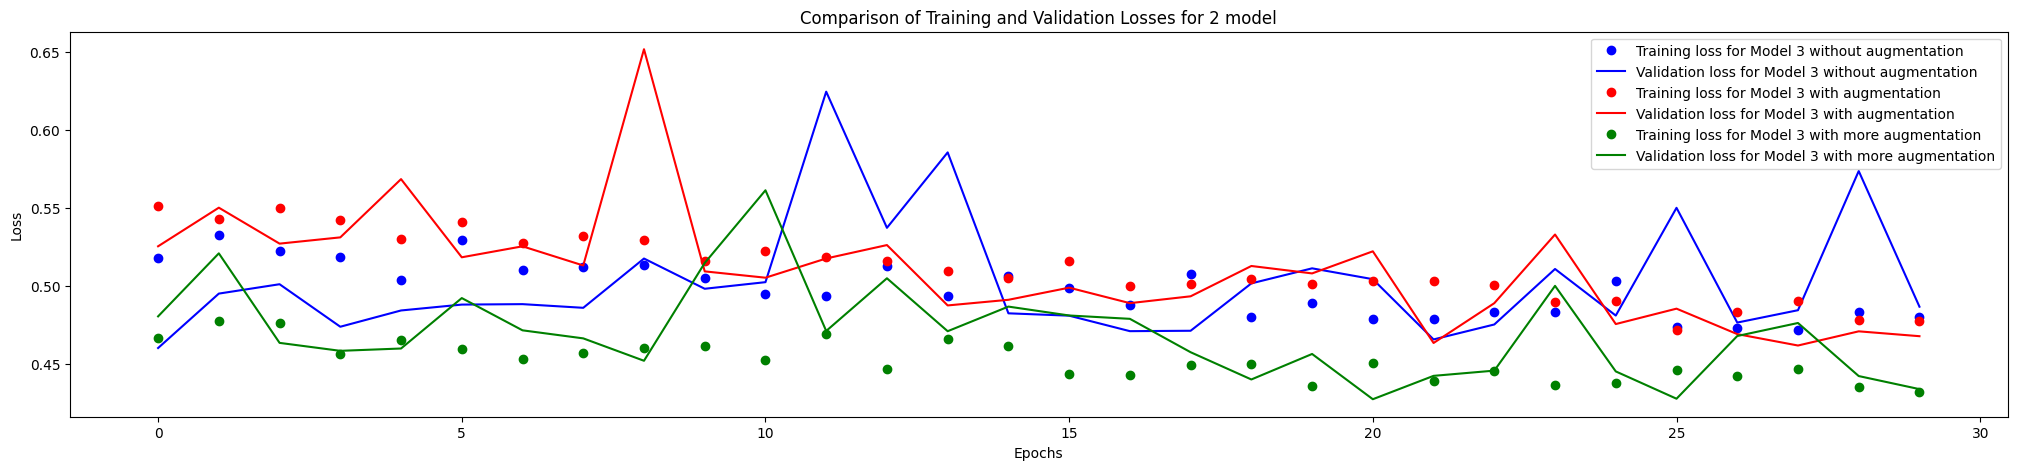

In [78]:
# Compare the losses of three training processes
loss1 = history8.history['loss']
val_loss1 = history8.history['val_loss']
loss2 = history3.history['loss']
val_loss2 = history3.history['val_loss']
loss3 = history9.history['loss']
val_loss3 = history9.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Model 3 without augmentation', 'Model 3 with augmentation', 'Model 3 with more augmentation')

Comparison of training and validation loss for model number 3 at different degrees of augmentation.


There is an overall downward trend in training loss for all scenarios, which is a positive sign of model learning.
The validation loss shows more variability than the training loss, which is normal when validating a model on data that was not used during training.


The model without augmentation (blue lines) tends to achieve a higher validation loss than training loss, which may indicate overfitting or lack of generalization.
The augmented model (red lines) and the more augmented model (green lines) appear to achieve a lower and more stable validation loss, suggesting that data augmentation improves model generalization.


Significant variations in the validation loss (especially for red lines) may indicate that the validation data is significantly different from the training data or that the model is not sufficiently robust to the diversity of the validation data.

The model with more augmentation (green lines) shows relative stability in the validation loss compared to models with less or no augmentation, suggesting that increasing augmentation may help improve model stability.

Sudden jumps in the validation loss for the red line (around 5, 10, 25 epochs) may be a signal of some problems with the validation data or the need for further tuning of the model.

Data augmentation can be beneficial to the overall performance and stability of the model. The model with greater data augmentation presents better generalization, as seen in the lower and more stable validation loss. However, large variations in the validation loss at some points may require additional analysis.

#**Plots-without augmentation comparision**

In [79]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies for models without augmentation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

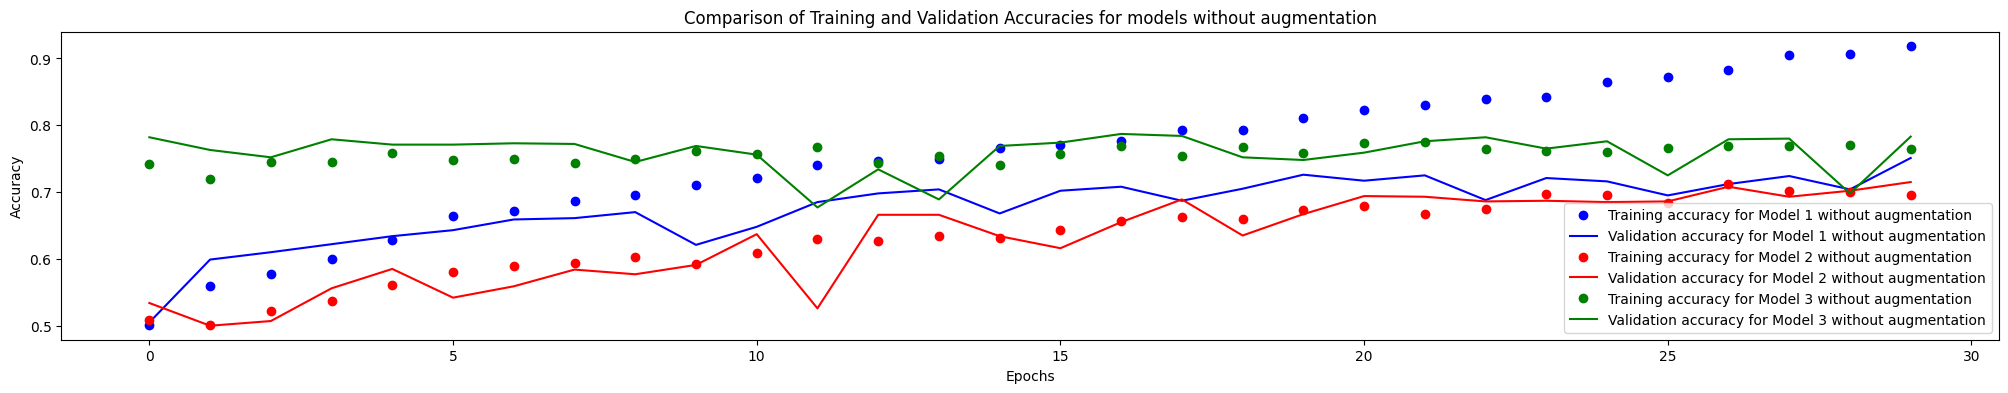

In [80]:
# Compare the accuracies of three training processes
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
acc12 = history6.history['acc']
val_acc2 = history6.history['val_acc']
acc3 = history8.history['acc']
val_acc3 = history8.history['val_acc']


PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Model 1 without augmentation', 'Model 2 without augmentation', 'Model 3 without augmentation')

Comparison of training and validation accuracy for three machine learning models without data augmentation.

All models show an increase in training accuracy with the number of epochs, suggesting that the models learn and improve their predictions over time.
Validation accuracy for all models is generally lower than training accuracy, which is normal, but can also indicate potential overfitting or lack of generalization.

For model 1 (blue lines), there is a relatively small gap between training and validation accuracy, which is a positive sign indicating good model fit.
Models 2 and 3 (red and green lines) show a larger difference between training and validation accuracy, especially model 2, which may suggest overtraining.

Model 1 (blue validation line) appears to be the most stable with the least amount of fluctuations, suggesting better generalization than the other models.
Model 3 (green validation line) also shows relative stability, but with higher accuracy values than model 2, which may indicate a better fit to the validation data than model 2.

Data augmentation could be considered to see if validation accuracy can be improved and if the discrepancy between training and validation can be reduced.
It could also be useful to adjust model parameters or regularization techniques to reduce the risk of overfitting, especially for model 2.

Model 1 has the best fit and generalization among the presented models, with the smallest difference between training and validation accuracy. Model 2 seems to be the most susceptible to overtraining.

In [81]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 4.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses for models without augmentation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

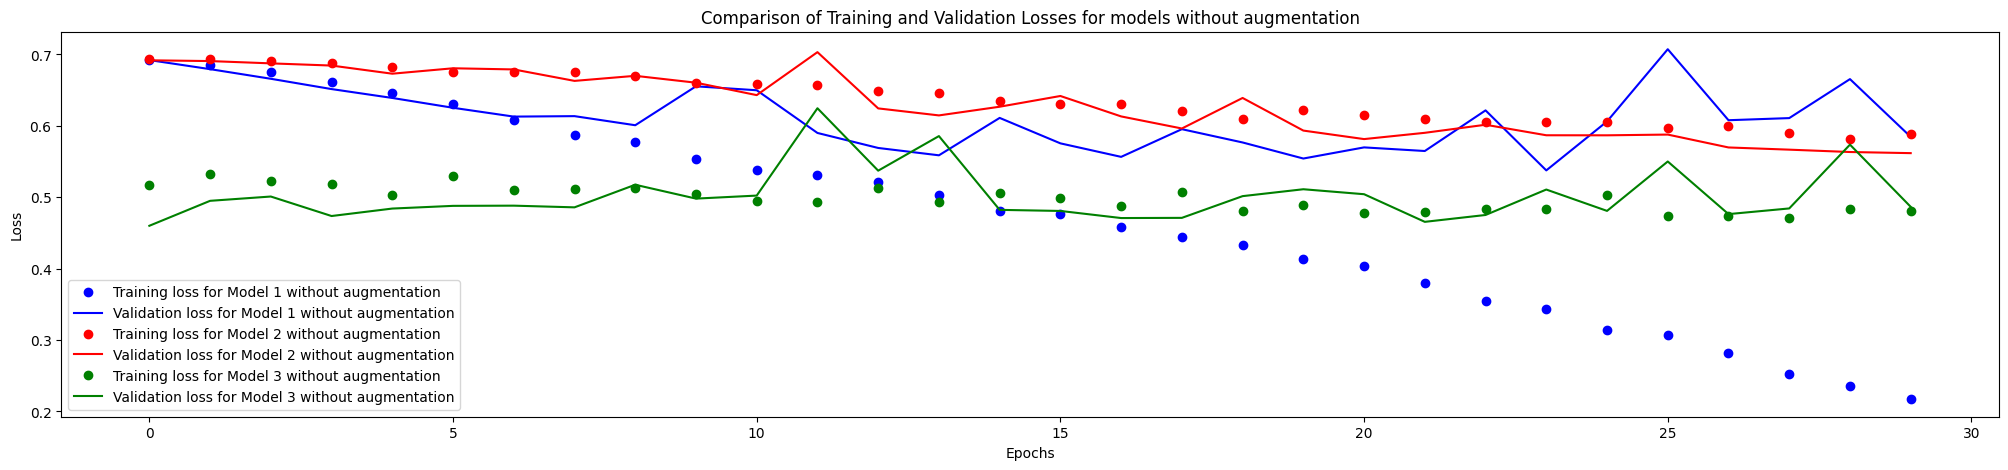

In [82]:
# Compare the losses of three training processes
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history6.history['loss']
val_loss2 = history6.history['val_loss']
loss3 = history8.history['loss']
val_loss3 = history8.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Model 1 without augmentation', 'Model 2 without augmentation', 'Model 3 without augmentation')

The graph shows a comparison of the training and validation loss for three different machine learning models that do not use data augmentation:

The training loss for all three models generally decreases with subsequent epochs, indicating that the models are improving their fit to the training data.
The validation loss is more variable, with marked fluctuations for each model. This phenomenon is normal because validation tests the model on data that was not seen during training.

Model 1 (blue and red lines) shows a relatively stable training and validation loss, but the validation loss is higher than the training loss, which may indicate some degree of overtraining.
Model 2 (red lines) has a lower initial training loss, but the validation loss is much higher and highly variable, indicating potential generalization problems.
Model 3 (green lines) starts with the highest training loss but improves quickly and shows a relatively low and stable validation loss, suggesting good generalization.

The stability of the validation loss of Model 3 is desirable because it suggests that the model is able to consistently deal with previously unseen data.
The variable validation loss of Model 2 may be a sign of overfitting to details in the training data that are not present in the validation data.

Model 3 seems to be the best candidate for further optimization due to its good generalization and stability.
Additional work may be needed for Model 2 to improve generalization, including the potential use of regularization techniques.
Model 1 could benefit from examining whether the difference in loss between training and validation is due to model limitations or overtraining.

Model 3 may be the best choice among those presented because it tends to achieve better generalization without significant overfitting. Model 2 may require the most attention to deal with its variable validation loss.

#**Plots-augmentation comparision**

In [83]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies for models with augmentation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

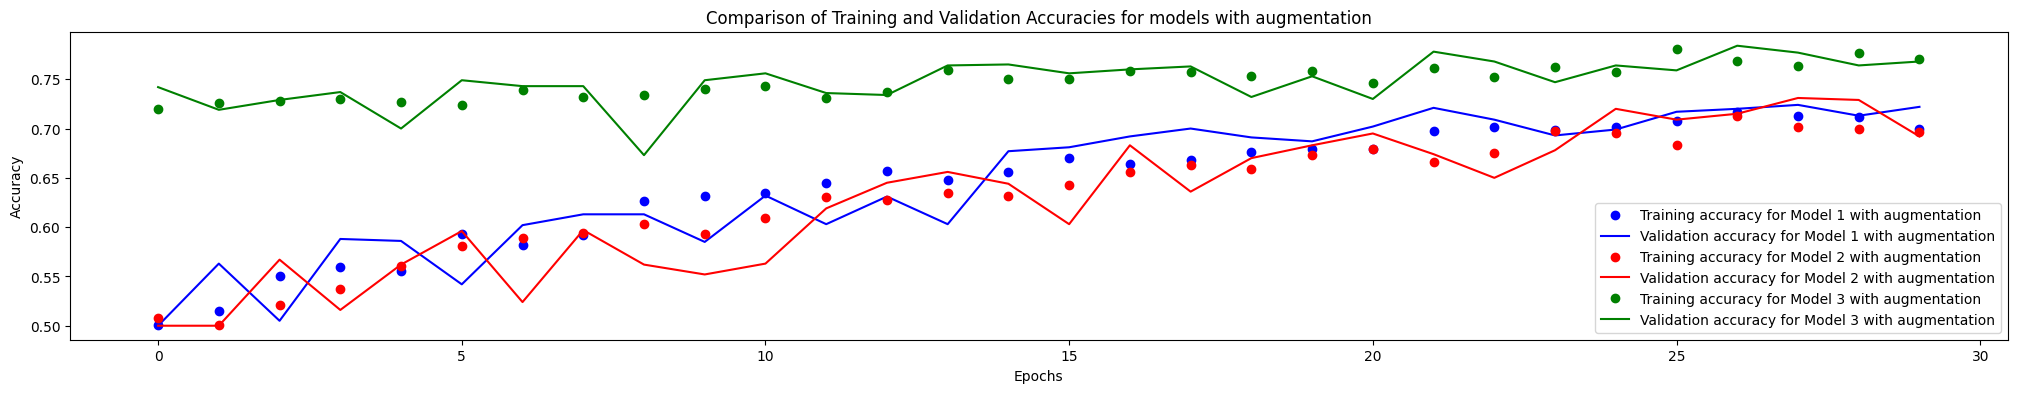

In [84]:
# Compare the accuracies of three training processes
acc1 = history4.history['acc']
val_acc1 = history4.history['val_acc']
acc12 = history2.history['acc']
val_acc2 = history2.history['val_acc']
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']


PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Model 1 with augmentation', 'Model 2 with augmentation', 'Model 3 with augmentation')

Comparison of training and validation accuracy for three machine learning models, each with data augmentation:

Training and validation accuracy for each model generally increases with the number of epochs. This suggests that the models are correctly learning and adapting to the training data, and that they are better able to generalize to the validation data.

Model 1 (blue lines) starts with the lowest training accuracy but achieves significant improvements, especially in the early epochs.
Model 2 (red lines) has better training accuracy than Model 1 initially, but does not show the same growth dynamics over subsequent epochs.
Model 3 (green lines) shows the highest and most stable accuracy in both training and validation compared to the other models, indicating that it may be the best performing model of the three.

For each model, validation accuracy is lower than training accuracy, which is typical, but these differences appear to be smaller for Model 3, suggesting that this model generalizes better and is potentially less susceptible to overfitting.

Model 1 and Model 2 show some variation in validation accuracy, which may indicate that these models are less stable in response to the diversity of validation data.
Model 3 is relatively stable in terms of validation accuracy, which is a good sign in terms of generalization to different data.

All three models improve their accuracy over time, and data augmentation appears to be effective in improving model performance. Model 3 seems to be the most promising due to its higher and more stable accuracy in both training and validation.

In [85]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 4.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses for models with augmentation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

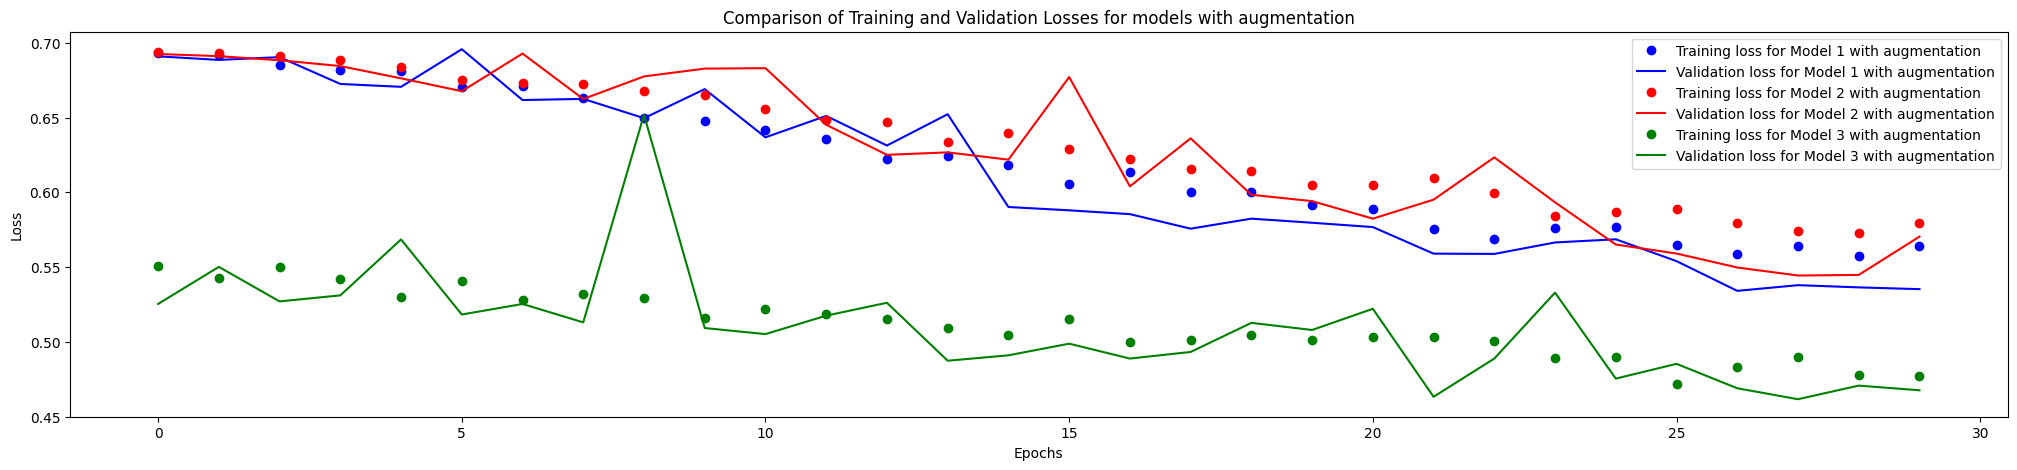

In [86]:
# Compare the losses of three training processes
loss1 = history4.history['loss']
val_loss1 = history4.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Model 1 with augmentation', 'Model 2 with augmentation', 'Model 3 with augmentation')

#**Plots-augmentation comparision**

In [87]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.plot(epochs, acc3, 'go', label='Training accuracy for ' + lab3)
    plt.plot(epochs, val_acc3, 'g', label='Validation accuracy for ' + lab3)
    plt.title('Comparison of Training and Validation Accuracies for models with more augmentation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

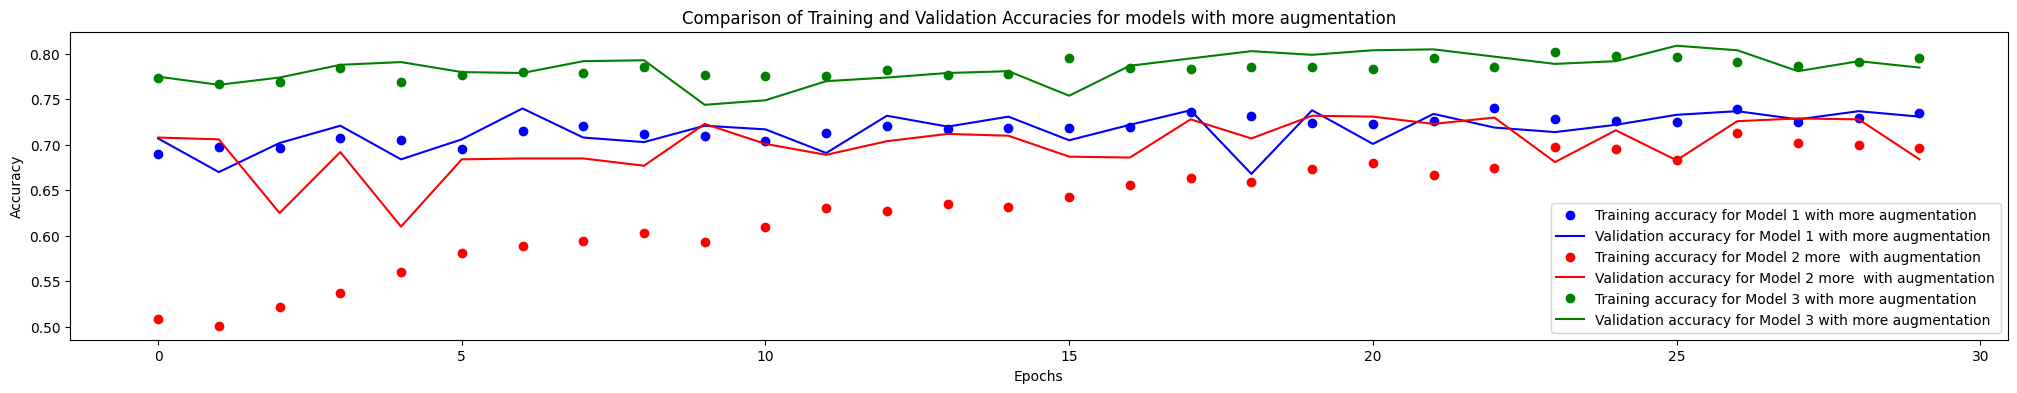

In [88]:
# Compare the accuracies of three training processes
acc1 = history5.history['acc']
val_acc1 = history5.history['val_acc']
acc12 = history7.history['acc']
val_acc2 = history7.history['val_acc']
acc3 = history9.history['acc']
val_acc3 = history9.history['val_acc']


PlotThreeAccuracyComparison(acc1, val_acc1, acc2, val_acc2, acc3, val_acc3, 'Model 1 with more augmentation', 'Model 2 more  with augmentation', 'Model 3 with more augmentation')

Comparison of training and validation loss for three machine learning models, each using data augmentation:

All models generally show a trend of decreasing training loss as epochs progress, which is an expected learning outcome.
The validation loss of each model shows some fluctuations, but the trend is not as clear as in the case of the training loss.

Model 1 (blue and red lines) shows a relatively small difference between training and validation loss, suggesting that the model generalizes well.
Model 2 (red and red dotted lines) has a much larger difference between training and validation loss, which may indicate overtraining.
Model 3 (green line) has a low and stable training loss, but the validation loss is much lower than in the case of the other models and shows a decreasing trend, which may indicate very good generalization.

Model 3 shows the greatest stability in the validation loss, which may indicate that this model copes best with new, unseen data.
Model 1 and Model 2 show higher variations in validation loss, which may indicate the need for further adjustment to improve their generalization ability.

Increases in validation loss for Model 1 and Model 2 may indicate that these models are not yet well suited to the validation data and may need further optimization.

Model 3 appears to be the most promising due to its low and stable training loss and decreasing validation loss, indicating solid generalization ability.
Model 1 and Model 2 may need additional work to reduce the difference between training and validation loss and improve their generalization.

In [89]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html

def PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, lab1 = '1', lab2 = '2', lab3 = '3'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 4.0) # set default size of plots
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.plot(epochs, loss3, 'go', label='Training loss for ' + lab3)
    plt.plot(epochs, val_loss3, 'g', label='Validation loss for ' + lab3)
    plt.title('Comparison of Training and Validation Losses for models with more augmentation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

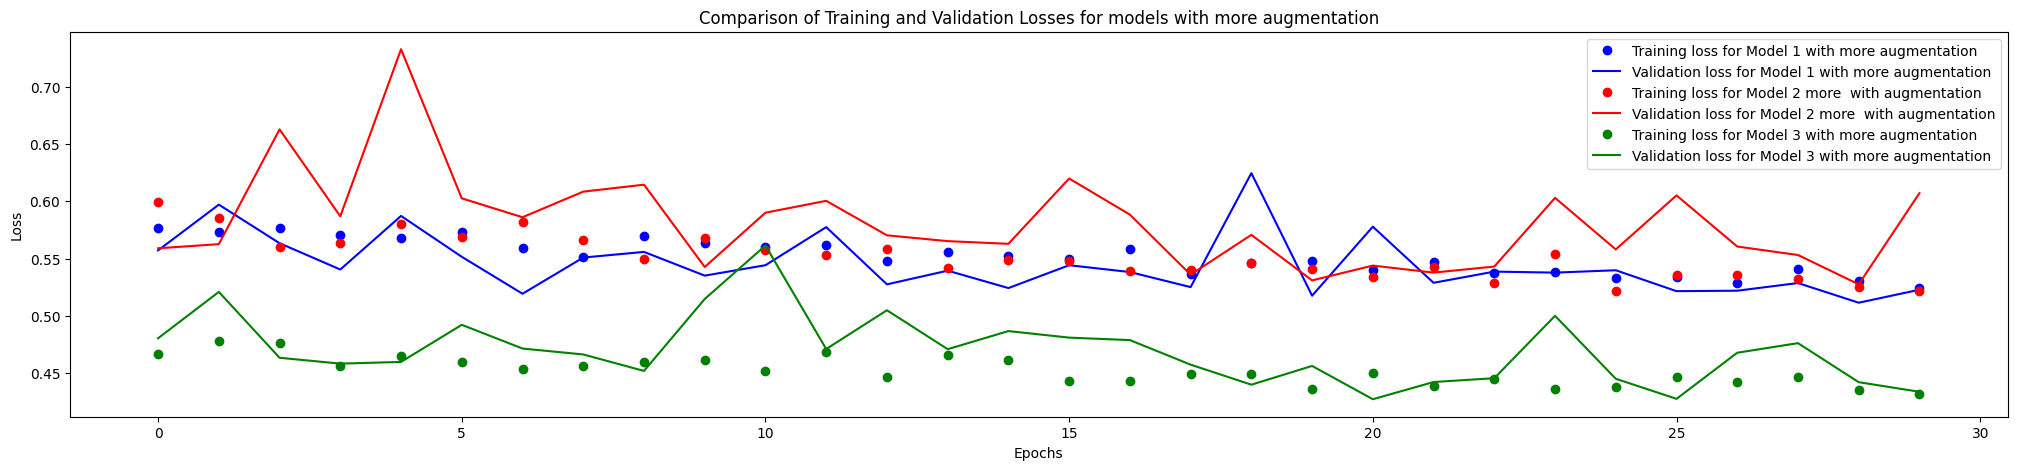

In [90]:
# Compare the losses of three training processes
loss1 = history5.history['loss']
val_loss1 = history5.history['val_loss']
loss2 = history7.history['loss']
val_loss2 = history7.history['val_loss']
loss3 = history9.history['loss']
val_loss3 = history9.history['val_loss']

PlotThreeLossComparison(loss1, val_loss1, loss2, val_loss2, loss3, val_loss3, 'Model 1 with more augmentation', 'Model 2 more  with augmentation', 'Model 3 with more augmentation')

Comparing training and validation accuracy for three machine learning models:

Training accuracy for all models generally increases or remains stable over epochs.
Validation accuracy for all models shows more variability compared to training accuracy, which is typical, but some patterns can be noticed.

Model 1 has a noticeable increase in training accuracy, but its validation accuracy remains relatively constant for most epochs, which may suggest early signs of overtraining or a ceiling in model performance on the validation data.

Model 2 has significantly lower training accuracy initially than the other models, but improves over time. Nevertheless, its validation accuracy is unstable and does not show a clear increase, which may indicate generalization problems.

Model 3 shows the highest and relatively stable accuracy in both training and validation, suggesting that it performs well at data augmentation and is able to maintain generalization.

The difference between training and validation accuracy is the smallest for Model 3, which is a positive indicator in terms of potential overfitting and the model's ability to generalize.

Model 3 appears to be the most promising in terms of overall accuracy and stability, making it the best candidate for further use or development.

Model 1 has solid accuracy but lacks improvement in validation, which may require additional attention.

Model 2, although showing some signs of improvement, may need further optimization to increase its validation and training accuracy.